Importamos el csv a nuestro nuevo NoteBook:

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [9]:
# Carga del archivo CSV en un DataFrame de pandas
target = pd.read_csv("df_TARGET.csv",sep=",", on_bad_lines='skip')
train = pd.read_csv("df_TRAIN.csv",sep=",", on_bad_lines='skip')
test = pd.read_csv("df_TEST.csv", sep=",", on_bad_lines='skip')
# Ahora podemos trabajar con el DataFrame en este nuevo Notebook

# 6. Feature engineering: transformación y creación de nuevas variables.

# 7. Pruebas de modelos

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Ajustamos nuestros df

In [11]:
train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,UDI
0,0.0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,NaN
1,1.0,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,NaN
2,2.0,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,NaN
3,3.0,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,NaN
4,4.0,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146424,NaN,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,9996.0
146425,NaN,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,9997.0
146426,NaN,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,9998.0
146427,NaN,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,9999.0


In [12]:
train = train.drop('Product ID', axis=1)
train

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,UDI
0,0.0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,NaN
1,1.0,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,NaN
2,2.0,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,NaN
3,3.0,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,NaN
4,4.0,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146424,NaN,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,9996.0
146425,NaN,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,9997.0
146426,NaN,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,9998.0
146427,NaN,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,9999.0


In [13]:
train = train.drop('Type', axis=1)
train

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,UDI
0,0.0,300.6,309.6,1596,36.1,140,0,0,0,0,0,NaN
1,1.0,302.6,312.1,1759,29.1,200,0,0,0,0,0,NaN
2,2.0,299.3,308.5,1805,26.5,25,0,0,0,0,0,NaN
3,3.0,301.0,310.9,1524,44.3,197,0,0,0,0,0,NaN
4,4.0,298.0,309.0,1641,35.4,34,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
146424,NaN,298.8,308.4,1604,29.5,14,0,0,0,0,0,9996.0
146425,NaN,298.9,308.4,1632,31.8,17,0,0,0,0,0,9997.0
146426,NaN,299.0,308.6,1645,33.4,22,0,0,0,0,0,9998.0
146427,NaN,299.0,308.7,1408,48.5,25,0,0,0,0,0,9999.0


In [14]:
train = train.drop(['id'], axis=1)
train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,UDI
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,NaN
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,NaN
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,NaN
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,NaN
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
146424,298.8,308.4,1604,29.5,14,0,0,0,0,0,9996.0
146425,298.9,308.4,1632,31.8,17,0,0,0,0,0,9997.0
146426,299.0,308.6,1645,33.4,22,0,0,0,0,0,9998.0
146427,299.0,308.7,1408,48.5,25,0,0,0,0,0,9999.0


In [15]:
target

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
146424,0
146425,0
146426,0
146427,0


## Asignamos X e y:

In [16]:
X=train
y=target['Machine failure'] # Añado la especidicacion de la columna para que "y" sea 1D

In [17]:
print(X.shape)  
print(y.shape)  

(146429, 11)
(146429,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Lista de modelos que vamos a probar
models = [
    ("RandomForest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier())
    # Agrega otros modelos que quieras probar
]

# Ciclo para entrenar y evaluar los modelos
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Conclusiones obtenidas: 
Model: RandomForest, Accuracy: 0.9961073550501947

## RandomSearch

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

In [22]:
reg_log = Pipeline(steps=[
                          ("imputer",SimpleImputer()),
                          ("scaler",StandardScaler()),
                          ("reglog",LogisticRegression(penalty='l1', solver='liblinear'))
                         ])

reg_log_param = {    
                 "imputer__strategy": ['mean', 'median', 'most_frequent'],
                 "reglog__penalty": ["l1","l2"], 
                 "reglog__C": np.logspace(0, 4, 10)
                }


search = RandomizedSearchCV(reg_log,
                           reg_log_param,
                           n_iter = 50, #Numero de modelos a probar
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=10)

# execute search
result = search.fit(X_train, y_train)

# 8. Análisis de los resultados

In [25]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Estimator: %s' % result.best_estimator_)

Best Score: 0.996363433783302
Best Hyperparameters: {'reglog__penalty': 'l2', 'reglog__C': 10000.0, 'imputer__strategy': 'most_frequent'}
Best Estimator: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=10000.0, solver='liblinear'))])


Best Score: 0.996363433783302
Best Hyperparameters: {'reglog__penalty': 'l2', 'reglog__C': 10000.0, 'imputer__strategy': 'most_frequent'}
Best Estimator: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=10000.0, solver='liblinear'))])

# 9. Interpretación de resultados y comprensión de los outputs

Gráficos para comparar las precisiones (accuracy) de los diferentes modelos:

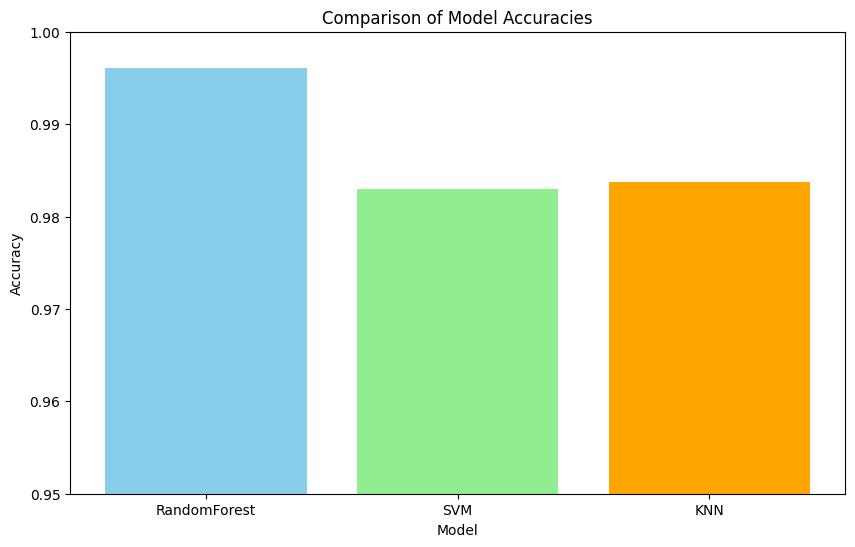

In [26]:
models = ['RandomForest', 'SVM', 'KNN']
accuracies = [0.9960390630335314, 0.9829952878508502, 0.9837806460424776]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.95, 1.0)  # Ajusta el rango del eje y si es necesario
plt.show()